In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

In [232]:
import numpy as np

def plot_ticks(X=None, width=100000, marker='.', color='red', s=20):
    
    plt.figure(figsize=(10, 1))
    plt.axis([0, width, -1, 1])
    plt.axes().get_yaxis().set_visible(False)
    plt.axhline(0, color='#dddddd', zorder=0)
    plt.xlabel('Word offset')
    
    if X is not None:
        
        plt.scatter(
            X, np.zeros_like(X),
            marker=marker, color=color, zorder=1, s=s,
        )
    
    plt.show()

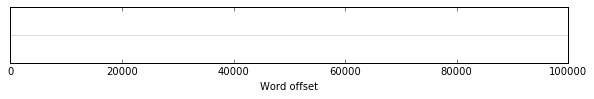

In [233]:
plot_ticks()

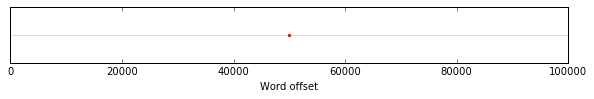

In [234]:
plot_ticks([50000])

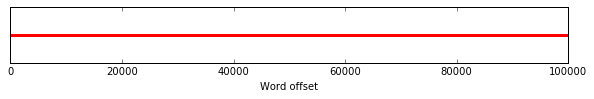

In [235]:
plot_ticks(np.arange(100000), s=10)

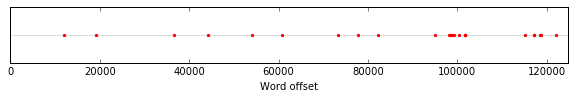

In [282]:
from lint.models import Text

text = (
    Text.query
    .filter_by(title='A passage to India')
    .one()
)

tokens = text.tokens()

death = [
    i for i, token in enumerate(tokens)
    if token.token == 'death'
]

plot_ticks(death, len(tokens))

In [ ]:
from sqlalchemy.sql.expression import func

texts = Text.query.order_by(func.random()).limit(100)

deaths = {}

for text in texts:
    
    tokens = text.tokens()
    
    deaths[text.id] = [
        i/len(tokens)
        for i, token in enumerate(tokens)
        if token.token == 'death'
    ]

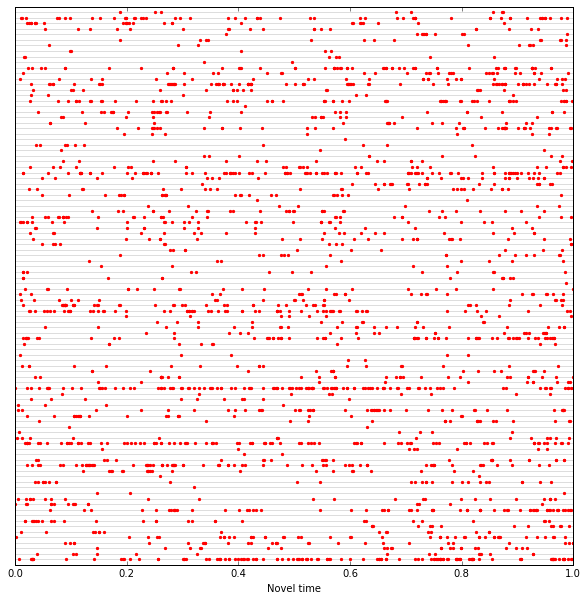

In [244]:
plt.figure(figsize=(10, 10))
plt.axes().get_yaxis().set_visible(False)
plt.axis([0, 1, -1, len(deaths)])
plt.xlabel('Novel time')

for i, (id, offsets) in enumerate(deaths.items()):
    
    plt.axhline(i, color='#dddddd', zorder=0)
    
    plt.scatter(
        offsets, np.full(len(offsets), i),
        color='red', marker='.'
    )
    
plt.show()

In [238]:
text = (
    Text.query
    .filter(Text.title.like('%For whom the bell tolls%'))
    .one()
)

tokens = hom.tokens()

death = [
    i/len(tokens)
    for i, token in enumerate(hom_tokens)
    if token.token == 'death'
]

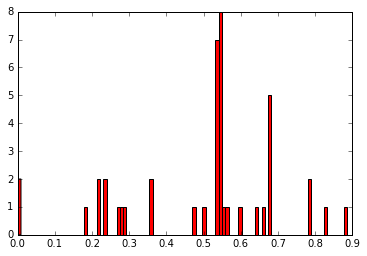

In [248]:
plt.hist(death, 100, color='red')
plt.show()

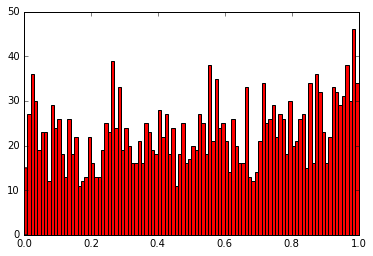

In [255]:
from functools import reduce

combined = reduce(lambda x, y: x+y, deaths.values(), [])
    
plt.hist(combined, 100, color='red')
plt.show()

In [260]:
list(deaths.items())[10]

(6937,
 [9.950578791999734e-05,
  0.020183090649772795,
  0.021277654316892766,
  0.06467876214799828,
  0.06502703240571826,
  0.0699194003117848,
  0.0938339580085575,
  0.10406646986633056,
  0.10608975422070384,
  0.10688580052406382,
  0.13081694251882317,
  0.13116521277654317,
  0.7194600152575541,
  0.7236060897542207,
  0.7794288367773392,
  0.9433314537795615])